In [1]:
import cv2
import easyocr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.117 🚀 Python-3.9.13 torch-2.0.1+cu117 CPU
Setup complete ✅ (4 CPUs, 3.7 GB RAM, 77.6/233.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
# load an pretrained model
model = YOLO('best.pt') 
model.conf = 0.4  #confidence threshold for detection

In [6]:
def preprocess_image(image):
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Display the grayscale image
    display(Image(data=cv2.imencode('.jpg',grayscale_image)[1].tobytes()))
    return grayscale_image
   

In [7]:
def threshold(image):
    # Apply Otsu thresholding
    _, threshold_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Display the threshold image
    display(Image(data=cv2.imencode('.jpg',threshold_image)[1].tobytes()))
    return threshold_image

In [8]:
def ocrImage(image):
    # Perform OCR on the thresholded image
    recognized_plates=[]
    reader = easyocr.Reader(['en', 'ne'])
    result = reader.readtext(image, allowlist='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ ', detail=0)
    recognized_plates = [''.join(result)]
    return recognized_plates
    

In [9]:
def recognize_number_plate(image_path):
    vehicle_image = cv2.imread(image_path)
    # Perform object detection using YOLO
    detections = model(vehicle_image)


    # Extract bounding boxes and crop number plate regions
    number_plate_box = None
    for detection in detections[0].boxes.data:
        if detection[5] == 0:  
            number_plate_box = detection[:4]
            break  
            
#      Draw bounding box on the original image
    if number_plate_box is not None:
        x1, y1, x2, y2 = number_plate_box
        cv2.rectangle(vehicle_image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    
    # Display the original image with bounding box
    display(Image(data=cv2.imencode('.jpg', vehicle_image)[1].tobytes()))
    
    # Crop and Preprocess the number plate region
    if number_plate_box is not None:
        # Crop the number plate region
        cropped_image = vehicle_image[int(y1):int(y2), int(x1):int(x2)]
        # Display the cropped image
        display(Image(data=cv2.imencode('.jpg', cropped_image)[1].tobytes()))
        
        gray_image= preprocess_image(cropped_image)
        threshold_image=threshold(gray_image)
        ocr= ocrImage(threshold_image)
        
    else:
        print("Number plate not found.")
        
    return ocr



0: 544x800 1 License-plate, 626.2ms
Speed: 9.4ms preprocess, 626.2ms inference, 1.4ms postprocess per image at shape (1, 3, 800, 800)


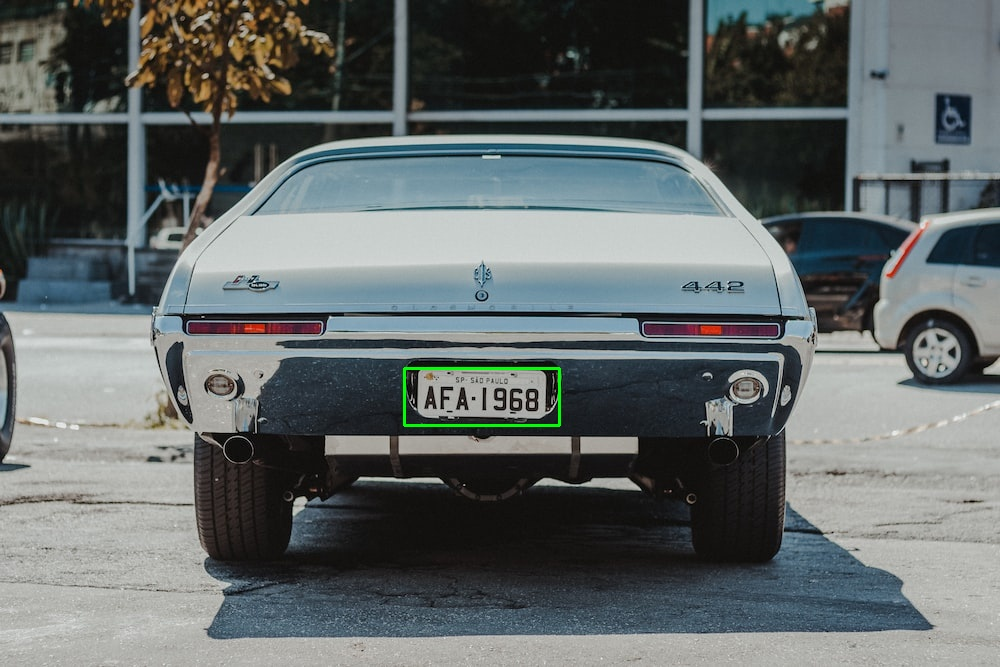

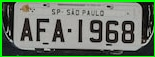

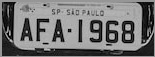

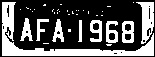

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
# Path to the image
image_path = 'test_img/12.jpeg'
Image(image_path)
# Recognize the number plate
recognized_plate = recognize_number_plate(image_path)





In [11]:
# Print the recognized number plates
for plate in recognized_plate:
    print(plate)

AFA  I968
